In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data, wb
import scipy as sp
from datetime import datetime
from scipy.stats import mode
from sklearn import linear_model
from sklearn.neighbors import NearestNeighbors
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
sb.set_style('darkgrid')
%matplotlib inline

In [2]:
start = datetime(2000, 1, 1)
end = datetime(2016, 10, 26)
stock_data = data.get_data_yahoo("GSPC", start, end)

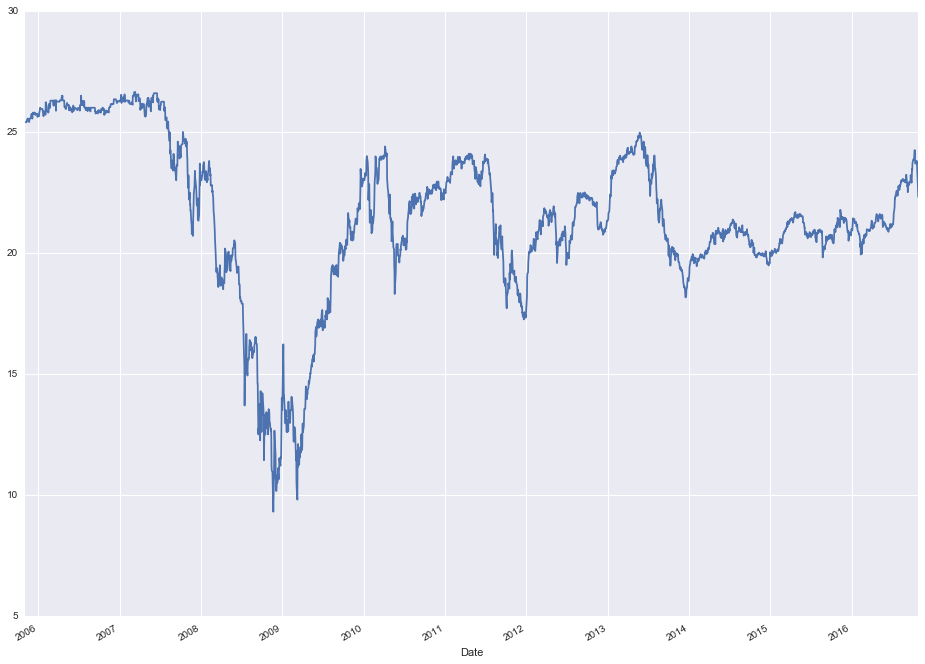

In [3]:
stock_data['Close'].plot(figsize=(16, 12))  

In [4]:
correlations = acf(stock_data['Close'])  
partial_correlations = pacf(stock_data['Close'])  

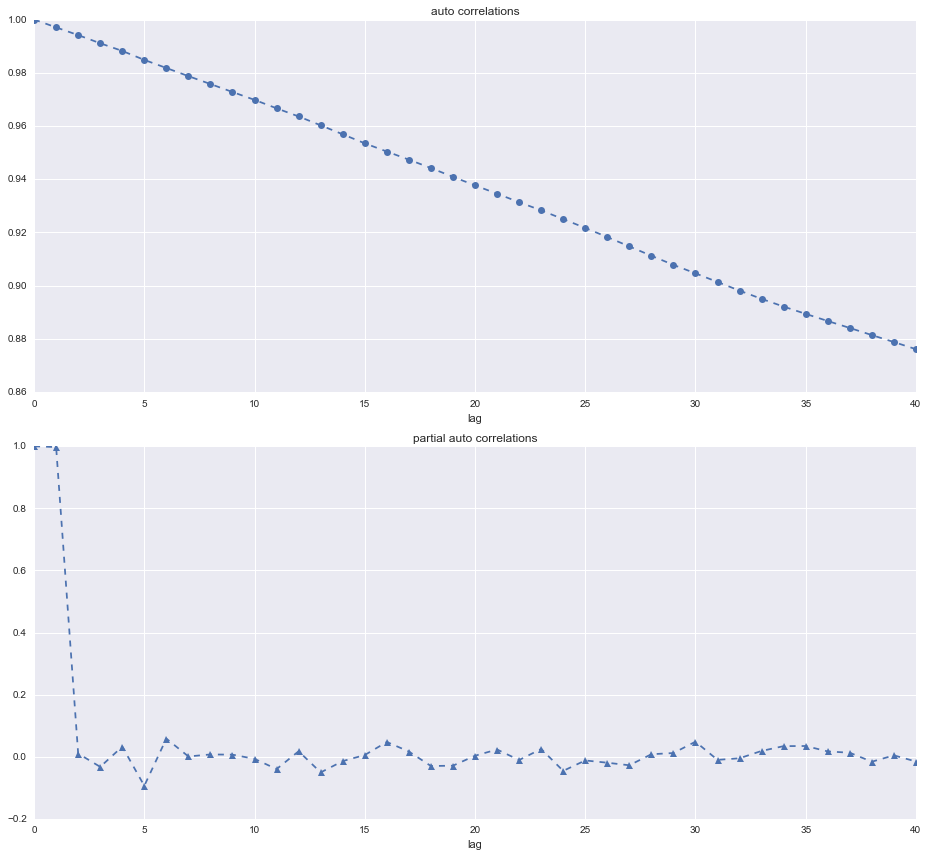

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(13, 12))  
ax[0].plot(correlations, marker='o', linestyle='--') 
ax[0].set_xlabel('lag')
ax[0].set_title('auto correlations')
ax[1].plot(partial_correlations, marker='^', linestyle='--') 
ax[1].set_xlabel('lag')
ax[1].set_title('partial auto correlations')
fig.tight_layout()  

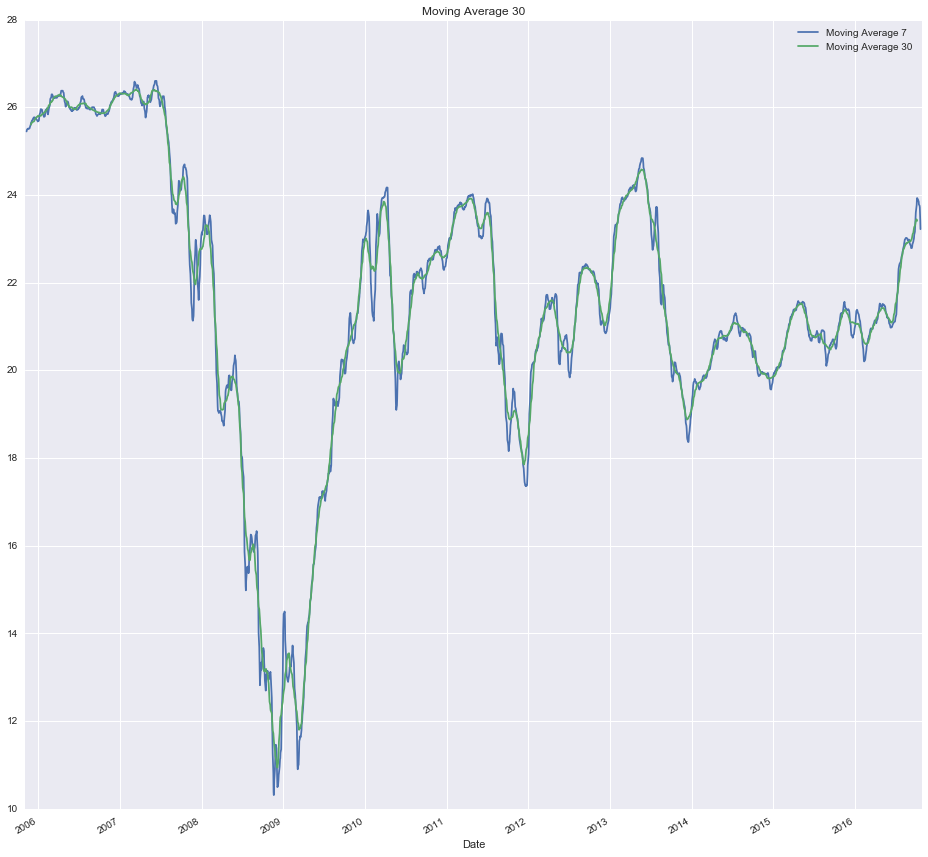

In [6]:
stock_data['Moving Average 7'] = stock_data['Close'].rolling(window=7,center=True).mean()
stock_data['Moving Average 30'] = stock_data['Close'].rolling(window=30,center=True).mean()

fig, ax = plt.subplots(1, 1, figsize=(13, 12))  
stock_data['Moving Average 7'].plot(ax=ax, title='Moving Average 7')  
stock_data['Moving Average 30'].plot(ax=ax, title='Moving Average 30')  
ax.legend()
fig.tight_layout()  

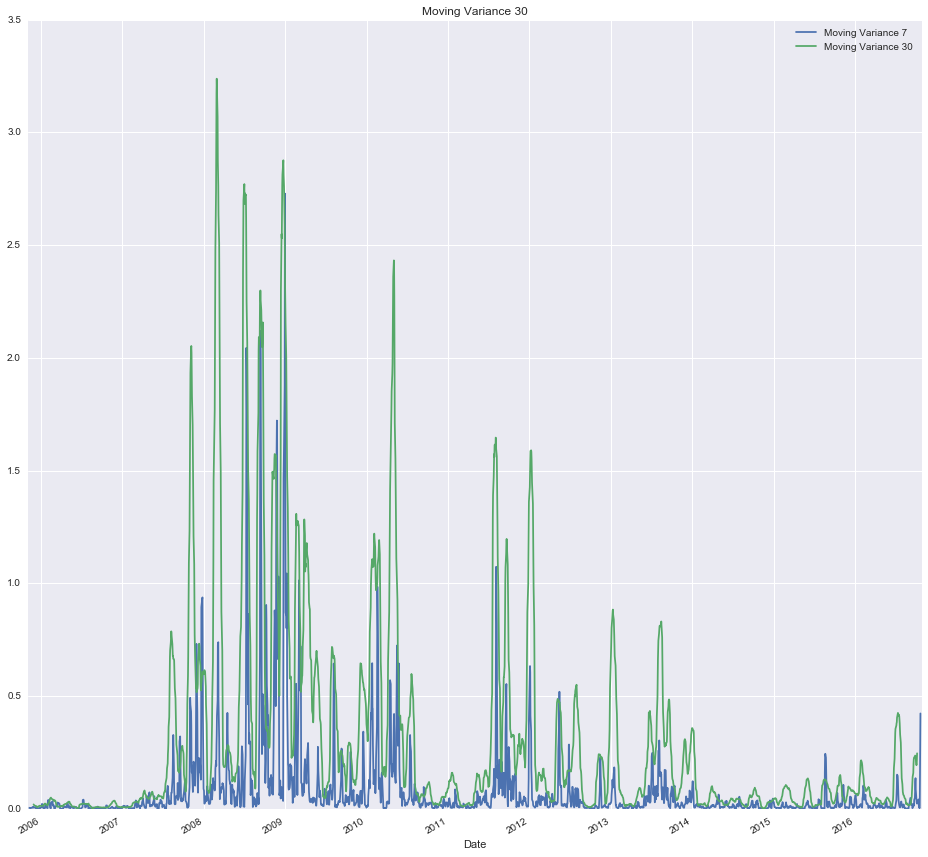

In [7]:
stock_data['Moving Variance 7'] = stock_data['Close'].rolling(window=7,center=True).var()
stock_data['Moving Variance 30'] = stock_data['Close'].rolling(window=30,center=True).var()

fig, ax = plt.subplots(1, 1, figsize=(13, 12))  
stock_data['Moving Variance 7'].plot(ax=ax, title='Moving Variance 7')  
stock_data['Moving Variance 30'].plot(ax=ax, title='Moving Variance 30')  
ax.legend()
fig.tight_layout()  

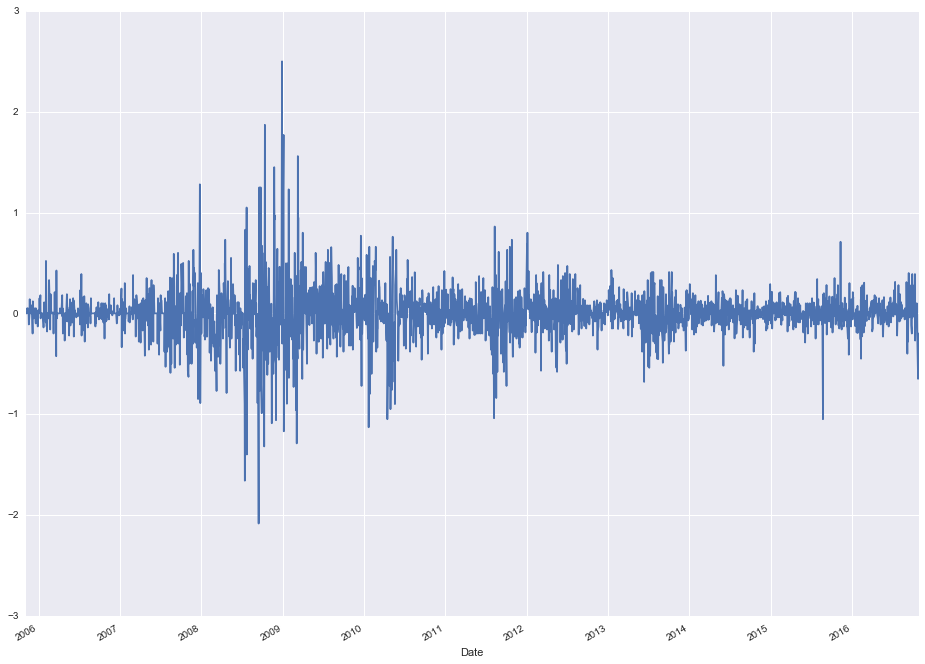

In [8]:
stock_data['First Difference'] = stock_data['Close'] - stock_data['Close'].shift()  
stock_data['First Difference'].plot(figsize=(16, 12)) 

In [9]:
diff_correlations = acf(stock_data['First Difference'].iloc[1:])  
diff_partial_correlations = pacf(stock_data['First Difference'].iloc[1:])  

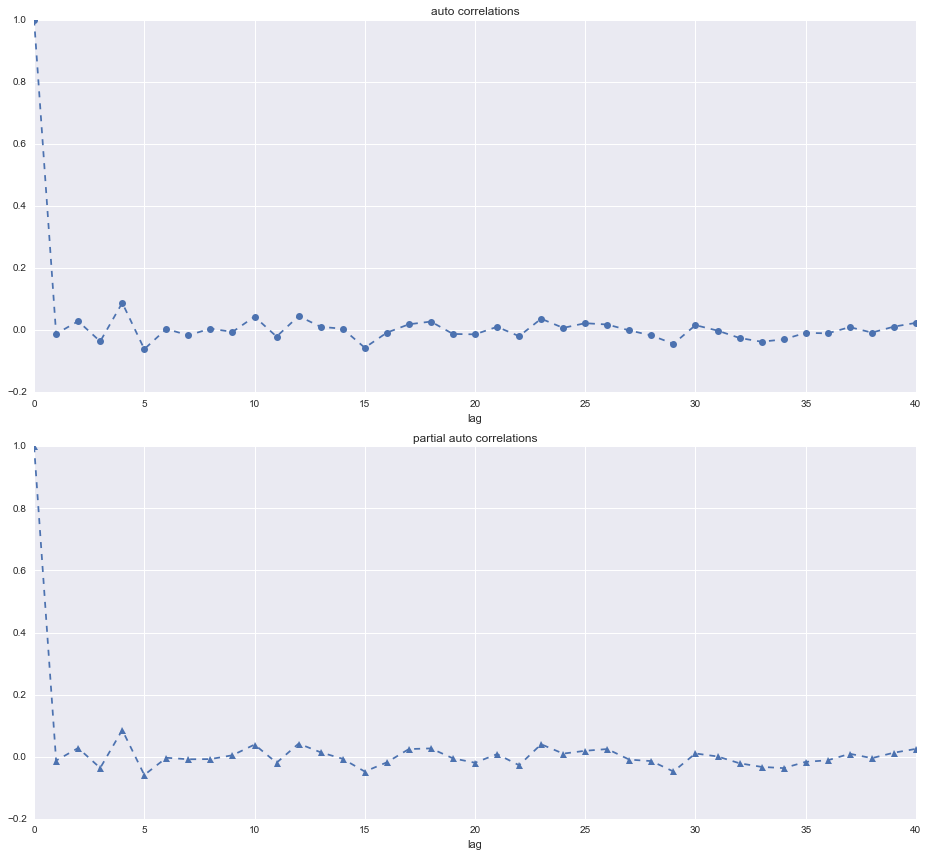

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(13, 12))  
ax[0].plot(diff_correlations, marker='o', linestyle='--') 
ax[0].set_xlabel('lag')
ax[0].set_title('auto correlations')
ax[1].plot(diff_partial_correlations, marker='^', linestyle='--') 
ax[1].set_xlabel('lag')
ax[1].set_title('partial auto correlations')
fig.tight_layout()  

In [11]:
stock_data['Lag 1'] = stock_data['First Difference'].shift()  
stock_data['Lag 2'] = stock_data['First Difference'].shift(2)  
stock_data['Lag 5'] = stock_data['First Difference'].shift(5)  
stock_data['Lag 30'] = stock_data['First Difference'].shift(30)

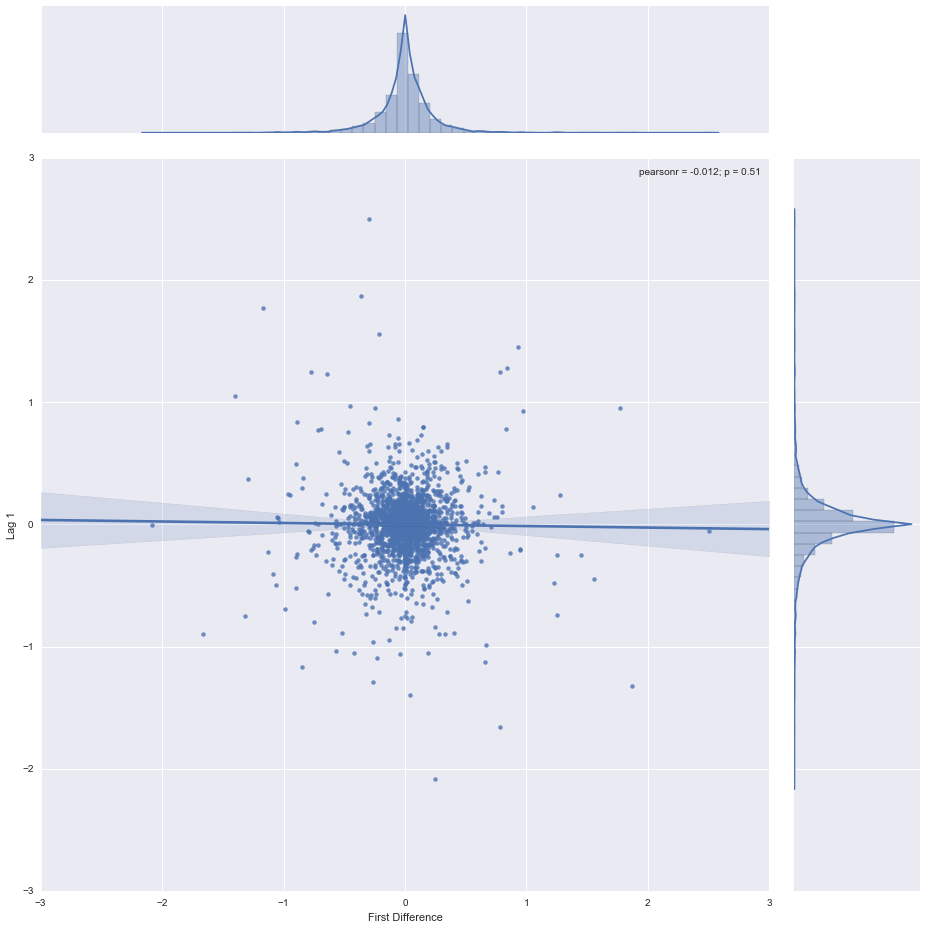

In [12]:
sb.jointplot('First Difference', 'Lag 1', stock_data, kind='reg', size=13)  

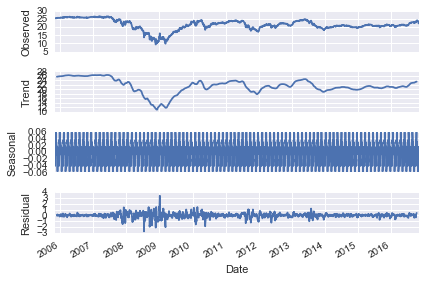

In [16]:
decomposition = seasonal_decompose(stock_data['Close'], model='additive', freq=30)  
fig = decomposition.plot() 

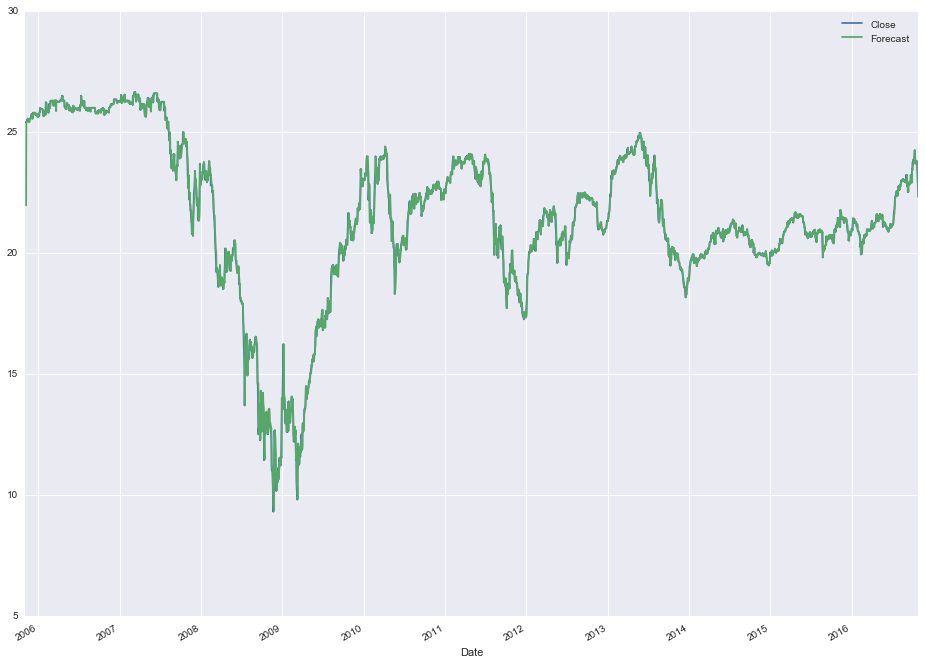

In [14]:
model = sm.tsa.ARIMA(stock_data['Close'].iloc[1:], order=(1, 0, 0))  
results = model.fit(disp=-1)  
stock_data['Forecast'] = results.fittedvalues  
stock_data[['Close', 'Forecast']].plot(figsize=(16, 12))  

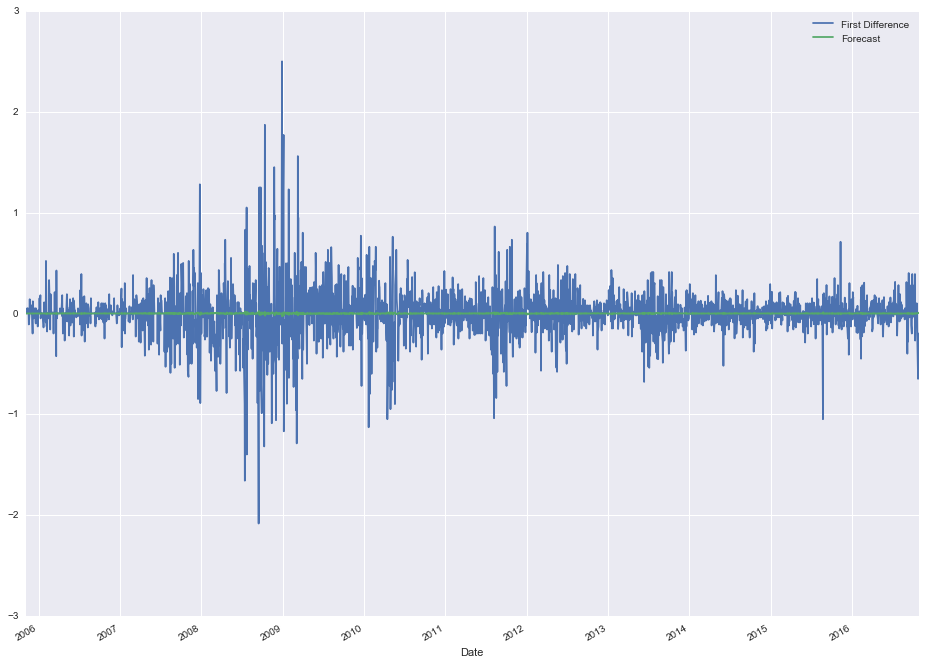

In [15]:
model = sm.tsa.ARIMA(stock_data['First Difference'].iloc[1:], order=(0, 0, 1))  
results = model.fit(disp=-1)  
stock_data['Forecast'] = results.fittedvalues  
stock_data[['First Difference', 'Forecast']].plot(figsize=(16, 12))  